In [1]:
import io
from collections import Counter

import numpy as np
import pandas as pd
import scipy.io
from statistics import mode
import sklearn.model_selection
import sklearn.tree
import seaborn as sns

import pydot
import multiprocessing as mp
from sklearn.feature_extraction import DictVectorizer

In [2]:
df_por, df_mat = pd.read_csv('student-por.csv', sep=';'), pd.read_csv('student-mat.csv', sep=';')

# EDA

## Dataset Description

Two seperate data set. Math + Portugees.

### these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20) <br>
31 G2 - second period grade (numeric: from 0 to 20) <br>
32 G3 - final grade (numeric: from 0 to 20, output target) <br>

Question: 
- Which dataset?
    - Focusing on one: straight forward. Less 

In [3]:
df_por.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
131,GP,F,18,U,GT3,T,2,1,services,other,...,5,4,5,1,3,5,10,10,9,8
621,MS,F,17,R,GT3,T,1,2,other,services,...,3,2,2,1,2,3,0,13,13,13
562,MS,F,16,R,LE3,T,2,2,other,services,...,5,4,3,1,1,1,0,11,13,12
483,MS,F,16,R,GT3,T,2,2,other,other,...,3,4,5,1,2,1,1,9,10,11
377,GP,M,18,U,GT3,T,4,4,other,other,...,4,3,3,2,2,3,0,13,14,13


In [4]:
df_mat.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
35,GP,F,15,U,GT3,T,2,3,other,other,...,3,5,1,1,1,5,0,8,7,6
170,GP,M,16,U,GT3,T,3,4,other,other,...,3,4,5,2,4,2,0,6,5,0
157,GP,F,18,R,GT3,T,1,1,at_home,other,...,5,2,5,1,5,4,6,9,8,10
15,GP,F,16,U,GT3,T,4,4,health,other,...,4,4,4,1,2,2,4,14,14,14
373,MS,F,17,R,GT3,T,1,2,other,other,...,3,5,5,1,3,1,14,6,5,5


**Note** Too seperate tasks for math/portugees. 

In [5]:
df_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
df_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


**Question** How to seperate the G1, G2, G3?
- Having a Pass/No Pass option.
- Having four letter grads. A/B/C/F.
        - Write functions for participants to seperate the letter grades. 
- Having them come up with their own ideas on how to evaluate the grade.
- Math and Portuguese, cross comparation? (The populations are **different**)
        - What's the point of doing this?
        - Different bias in different subjects.

In [7]:
print(df_por.shape, df_mat.shape)

(649, 33) (395, 33)


1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2 sex - student's sex (binary: 'F' - female or 'M' - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)


In [8]:
numerical_features = df_por.select_dtypes(include=['int64', 'float64']).columns.values
numerical_features

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

In [9]:
# Get different type of features. Features are same for both mat and por. 
categorical_features = df_por.select_dtypes(include=['object']).columns.values
categorical_features

array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'], dtype=object)

In [10]:
# One_hot_encoding
df_por_encoding = pd.get_dummies(df_por, columns=categorical_features)
df_mat_encoding = pd.get_dummies(df_mat, columns=categorical_features)

In [12]:
df_por_encoding.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

# Generating the threshold

In [19]:
# Define the criteria of failing/passing.

def generate_pnp(df, g_1=0.3, g_2=0.3, g_3=0.4, threshold=11):
    """
    Augmented the dataframe with a "pass" column.
    """    
    assert g_1 + g_2 + g_3 == 1, "The sum of percentages should be 1"
    assert 0 < threshold < 20, "Threshold need to be "
    df['pass'] = df.apply(lambda row: 1 
                                 if g_1*row['G1'] + g_2*row['G2'] + g_3*row['G3'] >= threshold
                                 else 0, axis=1)

In [20]:
generate_pnp(df_por_encoding)

In [32]:
ax = df_por_encoding['pass'].value_counts()
ax

1    384
0    265
Name: pass, dtype: int64

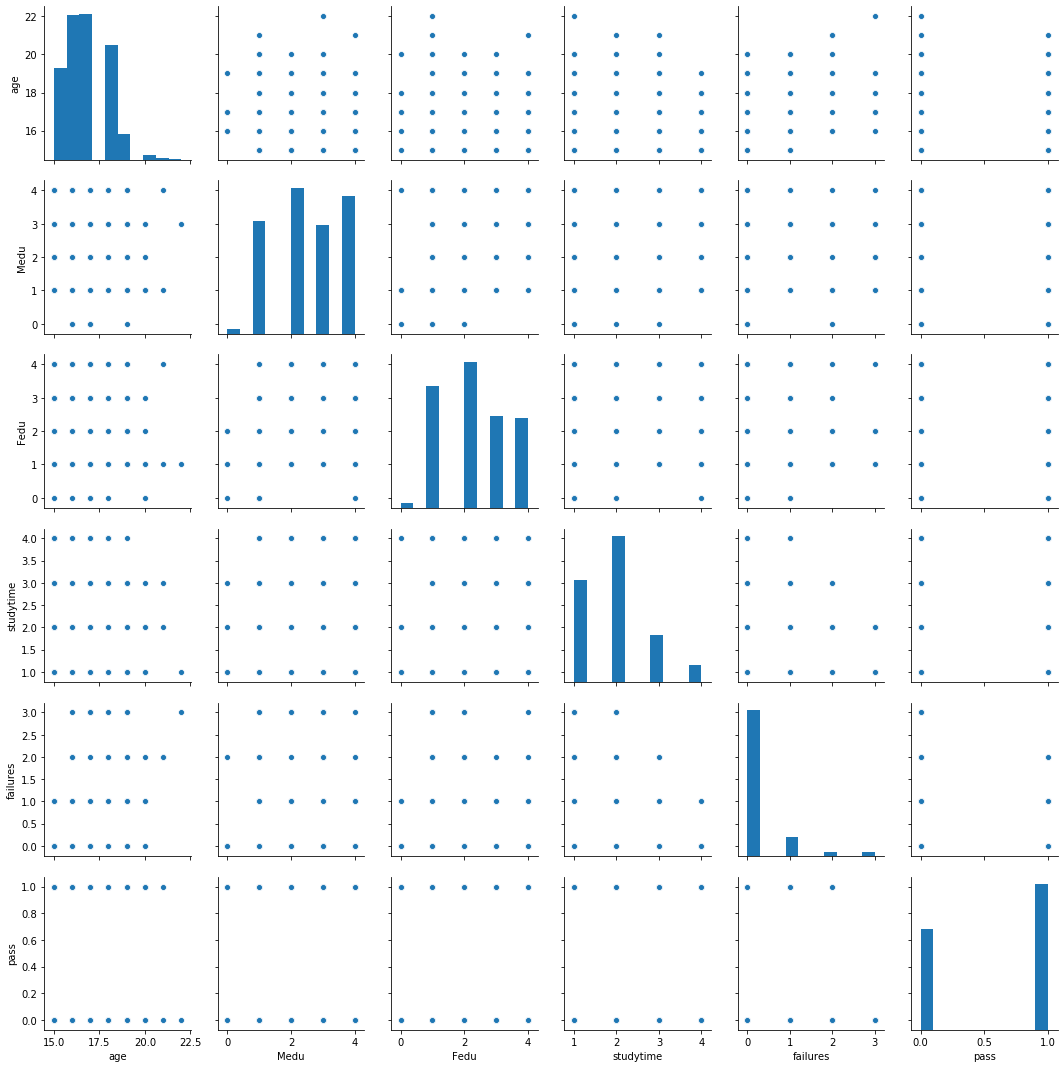

In [36]:

sns.pairplot(data=df_por_encoding[['age', 'Medu', 'Fedu', 'studytime', 'failures', 'pass']]);

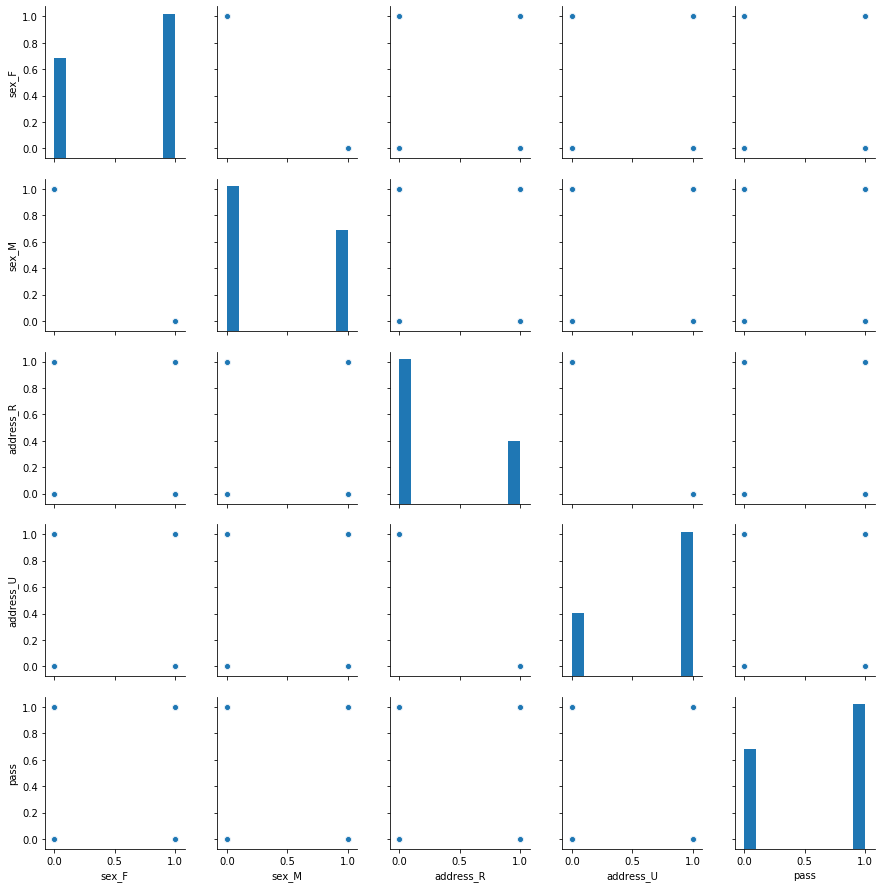

In [37]:
sns.pairplot(data=df_por_encoding[['sex_F', 'sex_M', 'address_R', 'address_U', 'pass']]);

Note: the visualization is not super helpful for discrete dataset. <br>
**Question**: Should we gave them example of EDA? --> Depend on how experienced they are? <br>
Maybe having them conduct EDA at home as well? <br>
Training, EDA all before the interview. 

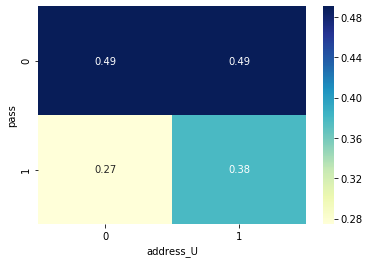

In [48]:
sex_address = df_por_encoding.pivot_table('sex_M', 'pass','address_U')
ax = sns.heatmap(sex_address, annot=True, cmap="YlGnBu");

In [50]:
df_por_encoding[['sex_M', 'pass','address_U']].sample(5)

,sex_M,pass,address_U
222,0,1,1
569,1,0,1
329,0,1,1
276,1,1,1
376,0,1,1


In [51]:
from sklearn.model_selection import train_test_split
df_por_new = df_por_encoding.drop(['G1', 'G2', 'G3'], axis=1)
y = df_por_new['pass']
X = df_por_new.drop(['pass'], axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)

In [54]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(486, 56) (163, 56) (486,) (163,)


In [57]:
from sklearn import tree
t_single = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
t_single = t_single.fit(X_train, y_train)

In [67]:
tree.export_graphviz(t_single, out_file = 'sample_tree.dot', label='all', impurity=False, proportion=True,
                    feature_names=list(X_train), class_names=['fail', 'pass'], filled=True, rounded=True)

In [58]:
t_single.score(X_test, y_test)

0.6993865030674846

In [65]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=6, random_state=15)
forest = forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.7239263803680982

In [ ]:
# Pivot table. 

# Heatmap.

# Correlation.

In [7]:
# Creating training and testing data.

# Decision Tree.

# AdaBoost.

# Random Forest.

**Potential Biased Attribute**
- Address: Urban vs. Rural. 
